## Summarization Architecture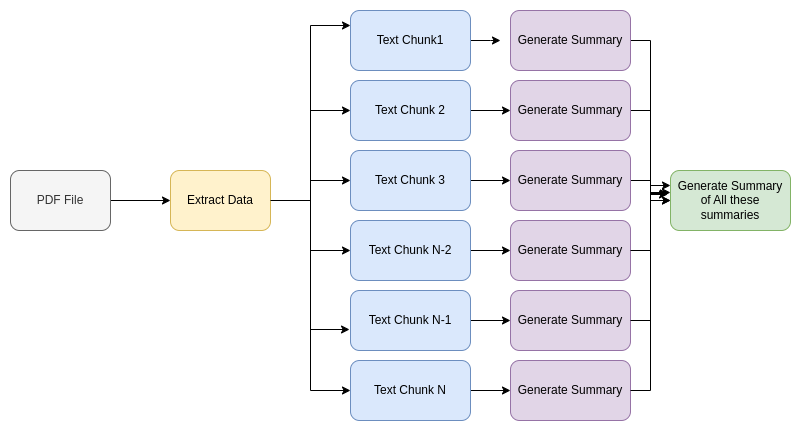

In [ ]:
!pip install -q gradio openai pypdf tiktoken langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.5/221.5 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.9/277.9 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 89.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 7.5 

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import sys
sys.path.append("/content/drive/MyDrive")

In [ ]:
from constant_keys import *
import os
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

In [ ]:
import os
import gradio as gr
from langchain import OpenAI, PromptTemplate
from langchain.chains.summarize import load_summarize_chain

In [ ]:
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [ ]:
!wget https://www.who.int/docs/default-source/coronaviruse/risk-comms-updates/update-28-covid-19-what-we-know.pdf

--2023-12-10 13:18:03--  https://www.who.int/docs/default-source/coronaviruse/risk-comms-updates/update-28-covid-19-what-we-know.pdf
Resolving www.who.int (www.who.int)... 104.18.155.21, 104.18.156.21, 2606:4700::6812:9c15, ...
Connecting to www.who.int (www.who.int)|104.18.155.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1764636 (1.7M) [application/pdf]
Saving to: ‘update-28-covid-19-what-we-know.pdf’

update-28-covid-19- 100%[===================>]   1.68M  2.61MB/s    in 0.6s    

2023-12-10 13:18:04 (2.61 MB/s) - ‘update-28-covid-19-what-we-know.pdf’ saved [1764636/1764636]



In [ ]:
loader = PyPDFLoader("/content/update-28-covid-19-what-we-know.pdf")

In [ ]:
docs = loader.load()

In [ ]:
docs

[Document(page_content="The picture can't be displayed.\nThe picture can't be displayed.\nWhat is COVID-19•COVID-19 is the infectious disease caused by the most recently discovered coronavirus1•This new virus and disease were unknown before the outbreak began in Wuhan, China, in December 2019•COVID-19 is now a pandemic affecting many countries globally\n1https://www.who.int/emergencies/diseases/novel-coronavirus-2019/question-and-answers-hub/q-a-detail/q-a-coronaviruses", metadata={'source': '/content/update-28-covid-19-what-we-know.pdf', 'page': 0}),
 Document(page_content="The picture can't be displayed.\nThe picture can't be displayed.\nImmunityPersonal measures Disease specificationsTesting TransmissionRisk groups Treatment Social & economicimpactContents\nThe picture can't be displayed.\nThe picture can't be displayed.\nThe picture can't be displayed.\nThe picture can't be displayed.\nThe picture can't be displayed.\nThe picture can't be displayed.\nThe picture can't be displayed.

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)

In [ ]:
texts = text_splitter.split_documents(docs)

In [ ]:
len(texts)

18

In [ ]:
llm = OpenAI()

In [ ]:
chain = load_summarize_chain(llm, chain_type="map_reduce", verbose=True)

In [ ]:
chain.run(texts)



> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"The picture can't be displayed.
The picture can't be displayed.
What is COVID-19•COVID-19 is the infectious disease caused by the most recently discovered coronavirus1•This new virus and disease were unknown before the outbreak began in Wuhan, China, in December 2019•COVID-19 is now a pandemic affecting many countries globally
1https://www.who.int/emergencies/diseases/novel-coronavirus-2019/question-and-answers-hub/q-a-detail/q-a-coronaviruses"


CONCISE SUMMARY:
Prompt after formatting:
Write a concise summary of the following:


"The picture can't be displayed.
The picture can't be displayed.
ImmunityPersonal measures Disease specificationsTesting TransmissionRisk groups Treatment Social & economicimpactContents
The picture can't be displayed.
The picture can't be displayed.
The picture can't be displayed.
The picture can't be disp

' COVID-19 is a pandemic caused by a newly discovered coronavirus which first appeared in Wuhan, China in December 2019. This article discusses topics related to the virus such as its source, transmission, risk groups, treatment, social and economic impact, and public health measures. It also explains the use of tests to diagnose current infection, and offers advice on how to protect oneself from the virus. Finally, the article discusses how the pandemic has led to an increase in inequality and poverty, and provides access to reliable advice and information.'

In [ ]:
def summarize_pdf(path):

  loader= PyPDFLoader(path)
  docs = loader.load()
  text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
  txts = text_splitter.split_documents(docs)
  chain = load_summarize_chain(llm, chain_type="map_reduce")
  summary = chain.run(txts)
  return summary



In [ ]:
input_pdf_path = gr.components.Textbox(label="PDF path")
output_summary = gr.components.Textbox(label="Summary")

In [ ]:
interface = gr.Interface(
    fn = summarize_pdf,
    inputs = input_pdf_path,
    outputs = output_summary,
    title = "PDF Summarizer",
    description ="Provide pdf file path to get the summary"
).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://2b0129b14bf505dc4d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
